### Introduction.
This data analysis is based on a course that I recently followed on Udemy.
#### Table of content
1. Importing necessary libraries
2. Data cleaning and Data preparation
3. Analyzing monthly sales
4. Order quantity and city analysis of those orders
5. Analyze the quantity of orders and the time at which those orders were placed.
6. Analyzing Product sold counts
7. Analyzing products that most often sold together

### Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import iplot

import os


### Data cleaning and Data preparation.

In [2]:
dir = os.listdir('../input/sales-data')
files = [file for file in dir]
for file in files:
    print(file)

Sales_August_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv


In [3]:
path = '../input/sales-data'

# create a blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data,current_df])

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [5]:
all_data.shape

(186850, 6)

In [6]:
# export the data frame to a csv file
all_data.to_csv('./all_data.csv', index=False)

In [7]:
# check null values and get sum of them for each coloumn.
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
# drop all the missing values with their rows.
all_data = all_data.dropna(how='all')

In [9]:
all_data.shape

(186305, 6)

### Analyzing monthly sales.


In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [11]:
# add a month column to the dataframe.
def month(x):
    return x.split('/')[0]
all_data['month'] = all_data['Order Date'].apply(month)

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [13]:
# check the data types of each column
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [14]:
# check unique values of month.
all_data['month'].unique()

array(['08', 'Order Date', '09', '05', '06', '02', '03', '11', '12', '01',
       '04', '10', '07'], dtype=object)

In [15]:
# creating a filter.
filter = all_data['month'] == 'Order Date'
all_data = all_data[~filter]

In [16]:
all_data.shape

(185950, 7)

In [17]:
# changing the data types
all_data['month'] = all_data['month'].astype(int)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [18]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [19]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [20]:
y = all_data.groupby('month')['sales'].sum()
months = range(1,13)
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

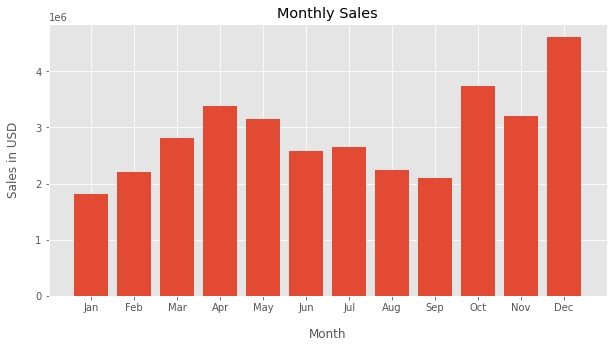

In [21]:
# plotting the data
plt.figure(figsize=(10,5))
plt.bar(months, y)
plt.xticks(months,month_labels)
plt.title('Monthly Sales')
plt.xlabel('Month',fontsize=12,labelpad=15)
plt.ylabel('Sales in USD',fontsize=12, labelpad=15)
plt.show()

The chart above shows that festive months like April, October and December have the highest sales of any other month. Of those months, December had the highest sales. From the chart above we can conclude that the best sales are during the festive season and the highest number of items are sold during the Christmas season.

### Order quantity and city analysis of those orders

In [22]:
# creating the city column.
def city(x):
    return x.split(',')[1]

all_data['city'] = all_data['Purchase Address'].apply(city)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City


In [23]:
city_counts = all_data.groupby('city')['city'].count()
city_counts = city_counts.to_frame(name="city_counts")
city_counts.index.names = ['city_name']
city_counts.reset_index(inplace=True)
city_counts.head()

,city_name,city_counts
0,Atlanta,14881
1,Austin,9905
2,Boston,19934
3,Dallas,14820
4,Los Angeles,29605


In [24]:
city_counts.shape

(9, 2)

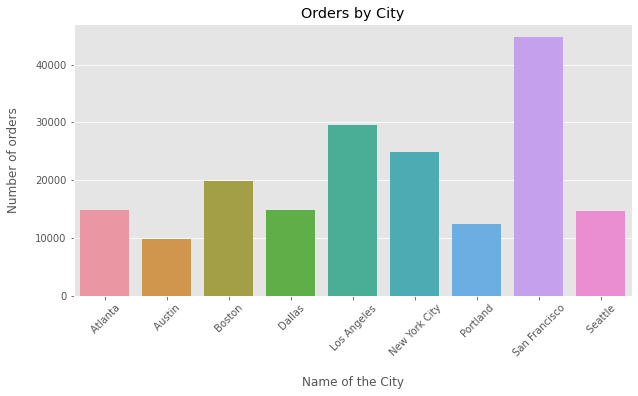

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=city_counts['city_name'],y=city_counts['city_counts'],data=city_counts)
plt.xlabel('Name of the City', fontsize=12, labelpad=15)
plt.ylabel('Number of orders',fontsize=12, labelpad=15)
plt.title('Orders by City')
plt.xticks(rotation=45)
plt.show()

In [26]:
all_data['Product'].values

array(['Wired Headphones', 'Bose SoundSport Headphones', 'iPhone', ...,
       'Vareebadd Phone', 'Wired Headphones',
       'Bose SoundSport Headphones'], dtype=object)

**Costal cities** like San Francisco, New York City, Los Angeles and Boston are the major cities ordering the most products. The products are mostly related to the electrical devices or smart devices. As many of these coastal cities are economically as well as technologically advanced, it can be concluded that people in those cities are increasingly buying smart devices and related products.

### Analyze the quantity of orders and the time at which those orders were placed.

In [27]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19


In [28]:
keys = []
hour = []
for key, hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

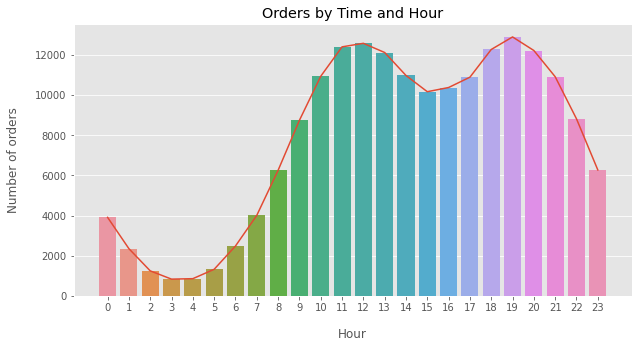

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x=keys,y=hour)
sns.lineplot(x=keys, y=hour)
plt.xlabel('Hour', fontsize=12, labelpad=15)
plt.ylabel('Number of orders',fontsize=12, labelpad=15)
plt.title('Orders by Time and Hour')
plt.show()

It seems like orders are placed mostly at less busy hours like 11:00 AM - 13:00 AM and 18:00 PM - 20:00 PM. This means, to increase the sales, we should display advertisements at these times.

### Analyzing Product sold counts

In [30]:
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
quantity = quantity.to_frame(name="product_counts")
quantity.reset_index(inplace=True)
quantity.head()

,Product,product_counts
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


In [31]:
quantity.shape

(19, 2)

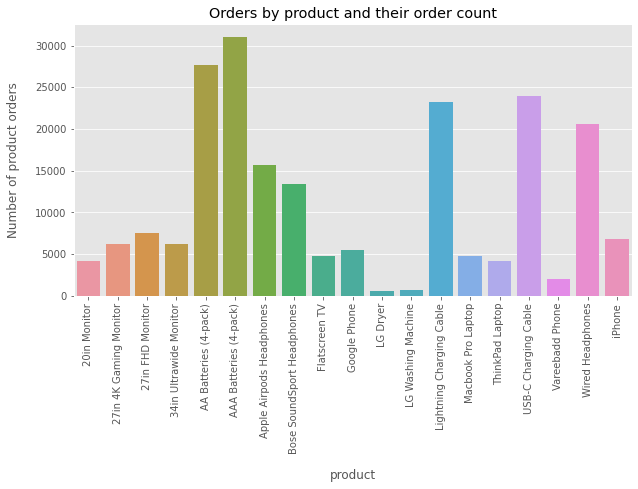

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=quantity['Product'],y=quantity['product_counts'],data=quantity)
plt.xlabel('product', fontsize=12, labelpad=15)
plt.ylabel('Number of product orders',fontsize=12, labelpad=15)
plt.title('Orders by product and their order count')
plt.xticks(rotation=90)
plt.show()

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19


In [34]:
quantity_1 = all_data.groupby('Product')['Quantity Ordered'].sum()
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
prices = all_data.groupby('Product')['Price Each'].mean()

In [35]:
products

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [36]:
quantity_1

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [37]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

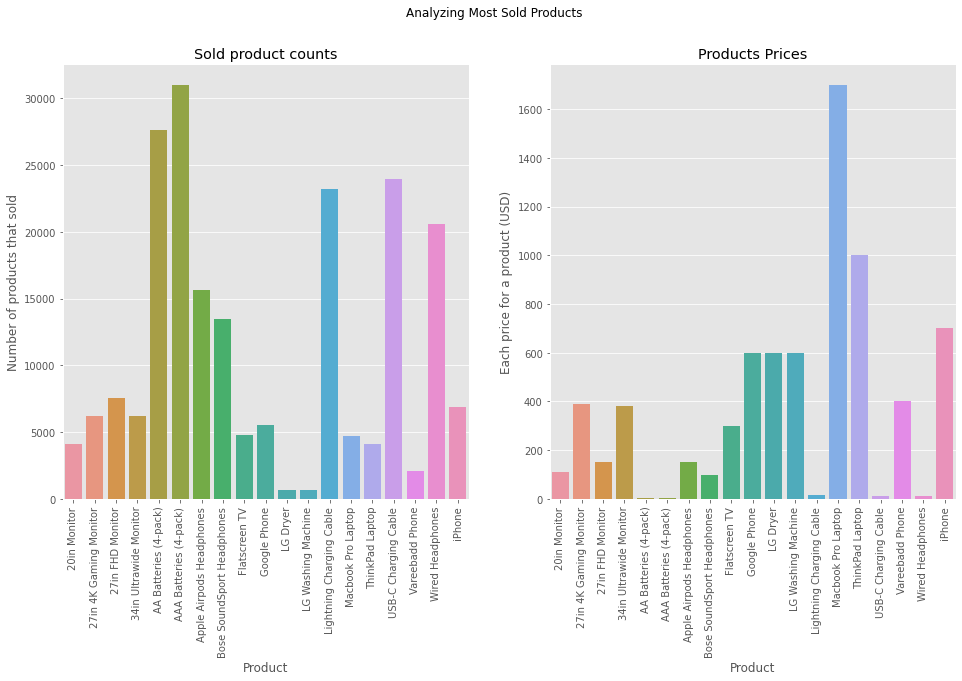

In [38]:
fig, axes = plt.subplots(1,2,sharex=True,figsize=(16,8))
fig.suptitle('Analyzing Most Sold Products')

axes[0].set_title('Sold product counts')
axes[0].set_ylabel('Number of products that sold')
sns.barplot(ax=axes[0], x=products, y=quantity_1.values)
axes[0].set_xticklabels(products, rotation=90)

axes[1].set_title('Products Prices')
axes[1].set_ylabel('Each price for a product (USD)')
sns.barplot(ax=axes[1], x=prices.index, y=prices.values)
axes[1].set_xticklabels(prices.index, rotation=90)

fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



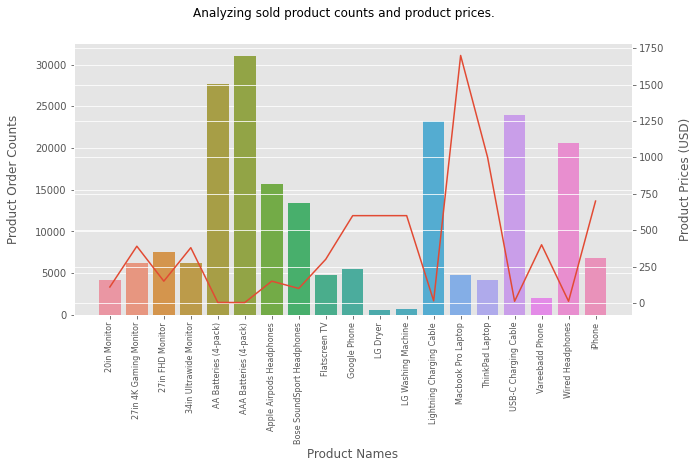

In [39]:
fig,ax1 = plt.subplots(figsize=(10,5))
fig.suptitle("Analyzing sold product counts and product prices.")
ax2=ax1.twinx()
sns.barplot(ax=ax1, x=products, y=quantity_1.values)
sns.lineplot(ax=ax2, x=products, y=prices.values)
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_xlabel("Product Names")
ax1.set_ylabel("Product Order Counts", labelpad=15)
ax2.set_ylabel("Product Prices (USD)", labelpad=15)
fig.show()

This indicates that the number of orders for cheap products such as AA Batteries (4-pack), AAA Batteries (4-pack), USB C charging cables and Lighting charging cables is much higher than the number of orders for non-cheap products.

### Analyzing products that most often sold together

In [40]:
# duplicated data manipulate
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco,20
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco,20
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco,9
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco,9
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City,10


In [41]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City,10,"Google Phone,Wired Headphones"


In [43]:
# drop duplicates data according to Order ID
df2 = df.drop_duplicates(subset=['Order ID'])
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City,10,"Google Phone,Wired Headphones"
132,236799,Google Phone,1,600.00,08/01/19 12:38,"309 2nd St, San Francisco, CA 94016",8,600.00,San Francisco,12,"Google Phone,Wired Headphones"
163,236829,Vareebadd Phone,1,400.00,08/16/19 08:51,"27 2nd St, Los Angeles, CA 90001",8,400.00,Los Angeles,8,"Vareebadd Phone,USB-C Charging Cable"


In [44]:
labels = df['Grouped'].value_counts()[0:5].index
counts = df2['Grouped'].value_counts()[0:5]

In [45]:
trace = go.Pie(labels=labels,
              values=counts,
              hoverinfo='label+percent',
              textinfo='value',
              textfont=dict(size=25),
              pull=[0,0,0,0.2,0])

In [46]:
iplot([trace])